In [2]:
import os
from pathlib import Path

import numpy as np
import librosa
import librosa.display
from scipy.fft import fft, fftfreq
from scipy.signal.windows import hann
import matplotlib.pyplot as plt

def to_db(spectrogram, power_spectr = False, min_db = -80):
    scale = 10 if power_spectr else 20
    spec_max = np.max(spectrogram)
    spec_db = np.clip(scale * np.log10(spectrogram / spec_max + 1e-12), a_min=min_db, a_max=0)
    return spec_db

In [4]:
sr = 16000
T = 1/sr

In [5]:
data_dir = Path(os.getcwd()).parent / 'data'
x_path = data_dir / 'in3.wav'
x_wav, _ = librosa.load(x_path, sr=sr)
x_wav = 2*(x_wav - np.min(x_wav)) / (np.max(x_wav) - np.min(x_wav))-1

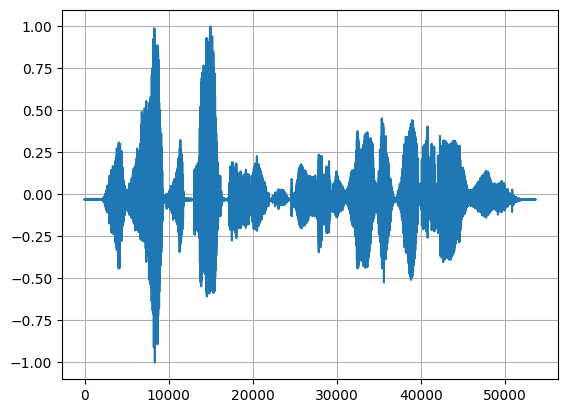

In [6]:
plt.plot(x_wav)
plt.grid()

Text(0, 0.5, 'Frequency [kHz]')

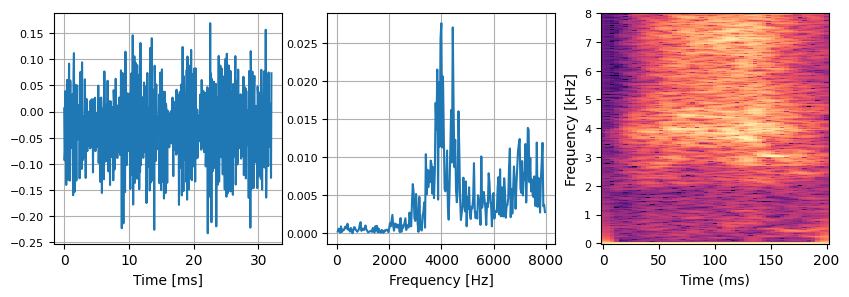

In [96]:
import matplotlib
N_FFT = 512
H = N_FFT // 8
time_max =  N_FFT/ sr * 1000
time = np.linspace(0,time_max, N_FFT)
freq = fftfreq(N_FFT, T)[1:N_FFT//2]

x_fricative_wav = x_wav[2000:5200]
x_fricative_frame = x_fricative_wav[1000:1000+N_FFT]

x_fricative_fft = np.abs(fft(x_fricative_frame))
x_fricative_fft = 2.0/N_FFT * x_fricative_fft[1:N_FFT//2]

x_fricative_stft = to_db(np.abs(librosa.stft(y=x_fricative_wav, n_fft=N_FFT, hop_length=H)))


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
img = ax[0].plot(time, x_fricative_frame)
ax[0].grid()
ax[0].yaxis.set_tick_params(labelsize=8)
ax[0].set_xlabel('Time [ms]')

ax[1].plot(freq, x_fricative_fft)
ax[1].grid()
ax[1].yaxis.set_tick_params(labelsize=8)
ax[1].set_xlabel('Frequency [Hz]')

librosa.display.specshow(x_fricative_stft, 
                         sr=16000, 
                         n_fft=N_FFT, 
                         hop_length = H, 
                         x_axis='ms',
                         y_axis='hz',
                         ax=ax[2])
freqs = [n for n in range(9)]
ax[2].yaxis.set_major_locator(matplotlib.ticker.FixedLocator([n*1000 for n in range(len(freqs))]))
ax[2].set_yticklabels(freqs, fontsize=8)
ax[2].set_ylabel('Frequency [kHz]')


Text(0, 0.5, 'Frequency [kHz]')

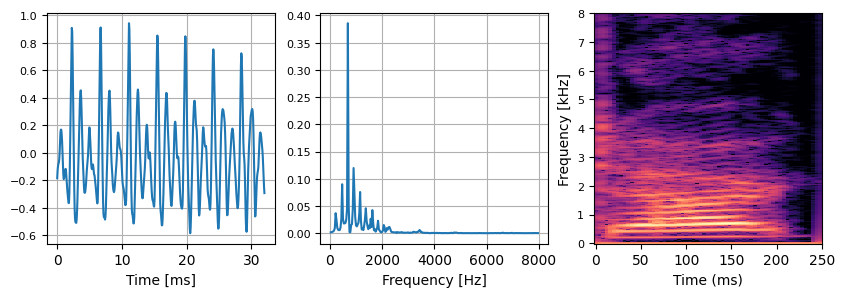

In [177]:
N_FFT = 512
H = N_FFT // 8
time_max =  N_FFT/ sr * 1000
time = np.linspace(0,time_max, N_FFT)
freq = fftfreq(N_FFT, T)[1:N_FFT//2]

x_vowel_wav = x_wav[13000:17000]
x_vowel_frame = x_vowel_wav[2000:2000+N_FFT]

x_vowel_fft = np.abs(fft(x_vowel_frame))
x_vowel_fft = (2.0/N_FFT * x_vowel_fft[1:N_FFT//2])

x_vowel_stft = to_db(np.abs(librosa.stft(y=x_vowel_wav, n_fft=N_FFT, hop_length=H)))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
img = ax[0].plot(time, x_vowel_frame)
ax[0].grid()
ax[0].yaxis.set_tick_params(labelsize=8)
ax[0].set_xlabel('Time [ms]')

ax[1].plot(freq, x_vowel_fft)
ax[1].grid()
ax[1].yaxis.set_tick_params(labelsize=8)
ax[1].set_xlabel('Frequency [Hz]')

librosa.display.specshow(x_vowel_stft, 
                         sr=16000, 
                         n_fft=N_FFT, 
                         hop_length = H, 
                         x_axis='ms', 
                         y_axis='hz',
                         ax=ax[2])
ax[2].yaxis.set_major_locator(matplotlib.ticker.FixedLocator([n*1000 for n in range(len(freqs))]))
ax[2].set_yticklabels(freqs, fontsize=8)
ax[2].set_ylabel('Frequency [kHz]')


Text(0.5, 0, 'Time [ms]')

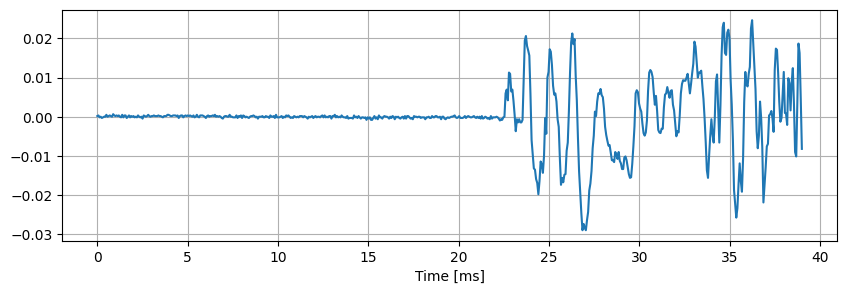

In [178]:
data_dir = Path(os.getcwd()).parent / 'data'
x_path2 = data_dir / 'in4.wav'
x_wav2, _ = librosa.load(x_path2, sr=sr)
x_wav2 = (2*(x_wav2 - np.min(x_wav2)) / (np.max(x_wav2) - np.min(x_wav2))-1)
x_plos_wav = x_wav2[28500:29124]
time_max =  (29124-28500)/ sr * 1000
time = np.linspace(0,time_max, len(x_plos_wav))

plt.figure(figsize=(10,3))
plt.plot(time, x_plos_wav-x_plos_wav.mean())
plt.grid()
plt.xlabel('Time [ms]')